<a href="https://colab.research.google.com/github/Jibril203/Kecerdasan-Buatan-A/blob/main/neural_network/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download dataset
!wget --no-check-certificate \
   https://github.com/Jibril203/Kecerdasan-Buatan-A/raw/main/Dataset.zip \
    -O /tmp/Dataset.zip

--2021-11-15 02:40:00--  https://github.com/Jibril203/Kecerdasan-Buatan-A/raw/main/Dataset.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Jibril203/Kecerdasan-Buatan-A/main/Dataset.zip [following]
--2021-11-15 02:40:01--  https://raw.githubusercontent.com/Jibril203/Kecerdasan-Buatan-A/main/Dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75478566 (72M) [application/zip]
Saving to: ‘/tmp/Dataset.zip’

/tmp/Dataset.zip    100%[===================>]  71.98M   140MB/s    in 0.5s    

2021-11-15 02:40:02 (140 MB/s) - ‘/tmp/Dataset.zip’ saved [75478566/75478566]



In [2]:
import os
import zipfile

local_zip = '/tmp/Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
base_dir = '/tmp/Dataset'

Kemangi = os.path.join(base_dir, 'Daun_Kemangi')
JambuBiji = os.path.join(base_dir, 'Daun_Jambu_Biji')

In [5]:
# Cek penamaan image yang ada di folder train_cats_dir dan train_dogs_dir
print(os.listdir(Kemangi)[:10])
print(os.listdir(JambuBiji)[:10])

['018.jpg', '026.jpg', '013.jpg', '045.jpg', '044.jpg', '037.jpg', '038.jpg', '029.jpg', '042.jpg', '050.jpg']
['084.jpg', '099.jpg', '059.jpg', '056.jpg', '093.jpg', '068.jpg', '073.jpg', '060.jpg', '078.jpg', '053.jpg']


In [6]:
# Cek jumlah data train dan data validation
print('total Daun Kemangi:', len(os.listdir(Kemangi)))
print('total Daun Jambu Biji:', len(os.listdir(JambuBiji)))

total Daun Kemangi: 50
total Daun Jambu Biji: 50


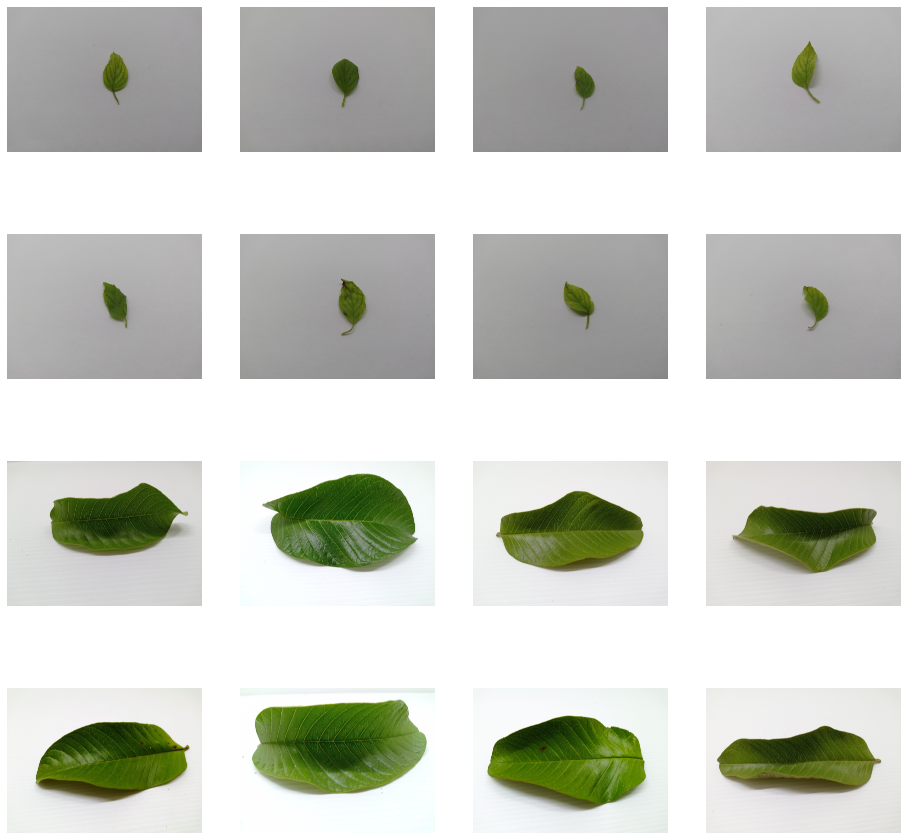

In [7]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_kemangi = [os.path.join(Kemangi, fname) 
                for fname in os.listdir(Kemangi)[pic_index-8:pic_index]]
next_JambuBiji = [os.path.join(JambuBiji, fname) 
                for fname in os.listdir(JambuBiji)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_kemangi+next_JambuBiji):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [8]:
import cv2
import numpy as np

# Gather data Kemangi
Kemangi_data = []
Kemangi_label = []
for r, d, f in os.walk(Kemangi):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            Kemangi_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            Kemangi_label.append(label)

Kemangi_data = np.array(Kemangi_data)
Kemangi_label = np.array(Kemangi_label)

In [11]:
# Gather data JambuBiji
JambuBiji_data = []
JambuBiji_label = []
for r, d, f in os.walk(JambuBiji):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            JambuBiji_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            JambuBiji_label.append(label)

JambuBiji_data = np.array(JambuBiji_data)
JambuBiji_label = np.array(JambuBiji_label)

<h3>Data Preprocessing</h3>

In [12]:
# Tampilkan shape dari data train dan data validation
print("Data Kemangi = ", Kemangi_data.shape)
print("Label Kemangi = ", Kemangi_label.shape)
print("Data Jambu Biji = ", Kemangi_data.shape)
print("Label Jambu Biji = ", Kemangi_label.shape)

Data Kemangi =  (50, 150, 150, 3)
Label Kemangi =  (50,)
Data Jambu Biji =  (50, 150, 150, 3)
Label Jambu Biji =  (50,)


In [14]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", Kemangi_data[0][0][0])

x_Kemangi = Kemangi_data.astype('float32') / 255.0
x_JambuBiji = JambuBiji_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_Kemangi[0][0][0])

Data sebelum di-normalisasi  [174 174 174]
Data setelah di-normalisasi  [0.68235296 0.68235296 0.68235296]


In [15]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", Kemangi_label[20:30])

lb = LabelEncoder()
y_Kemangi = lb.fit_transform(Kemangi_label)
y_JambuBiji = lb.fit_transform(JambuBiji_label)

print("Label setelah di-encoder ", y_Kemangi[20:30])

Label sebelum di-encoder  ['Daun_Kemangi' 'Daun_Kemangi' 'Daun_Kemangi' 'Daun_Kemangi'
 'Daun_Kemangi' 'Daun_Kemangi' 'Daun_Kemangi' 'Daun_Kemangi'
 'Daun_Kemangi' 'Daun_Kemangi']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0]


<h3>Definisikan Model</h3>

In [16]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [17]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [18]:
# Tampilkan model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 128)               8640128   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 8,640,257
Trainable params: 8,640,257
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [21]:
H = model.fit(x_Kemangi, y_Kemangi, batch_size=20, epochs=50, validation_data=(x_JambuBiji, y_JambuBiji))

Epoch 1/50
3/3 [==============================] - 1s 180ms/step - loss: 0.3332 - acc: 0.6000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 2/50
3/3 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 3/50
3/3 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 79ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 85ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 6/50
3/3 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 80ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 8/50
3/3 [============================

<h3>Evaluasi Model</h3>

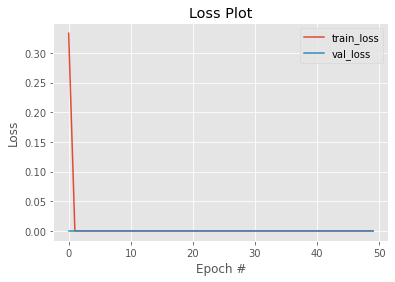

In [22]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

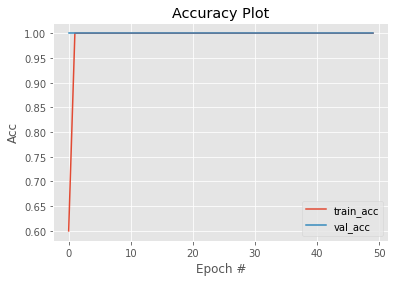

In [23]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import classification_report

pred = model.predict(x_JambuBiji)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_JambuBiji, labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

